In [19]:
import tensorflow as tf

In [3]:
sess = tf.InteractiveSession()

In [4]:
hello = tf.constant("hello world")

In [5]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [20]:
sess = tf.Session()

In [7]:
sess.run(hello)

b'hello world'

In [22]:
x = tf.constant(3)
y = tf.constant(2)

In [23]:
with tf.Session() as sess:
    print('First TensorFlow')
    print('Addition',sess.run(x+y))
    print('Substraction', sess.run(x-y))

First TensorFlow
Addition 5
Substraction 1


In [24]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [25]:
addi = tf.add(x,y)
subi = tf.subtract(x,y)
mul = tf.multiply(x,y)

In [26]:
d = {x: 30, y:15}

In [28]:
with tf.Session() as sess:
    print('Placeholder')
    print('Addition', sess.run(addi, feed_dict = d))
    print('Substraction', sess.run(subi, feed_dict = d))

Placeholder
Addition 45
Substraction 15


In [29]:
import numpy as np

In [33]:
x = np.array([[5.0,5.0]])
y = np.array([[2.0],[3.0]])
z = np.array([[2,3,1],[4,5,6]])

In [34]:
mat1 = tf.constant(x)

In [35]:
mat2 = tf.constant(y)

In [36]:
matrixMul = tf.matmul(mat1,mat2)

In [37]:
print(matrixMul)

Tensor("MatMul:0", shape=(1, 1), dtype=float64)


In [39]:
with tf.Session() as sess:
    print('Matrix multiplication',sess.run(matrixMul))

Matrix multiplication [[ 25.]]


In [40]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [41]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [58]:
type(mnist.train.images)
mnist.train.images[2].shape

(784,)

In [59]:
sample = mnist.train.images[2].reshape(28,28)

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

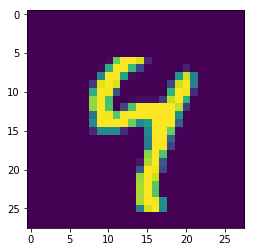

In [61]:
plt.imshow(sample)

In [62]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [63]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = mnist.train.num_examples

In [64]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [65]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [66]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [70]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
pred = multilayer_perceptron(x, weights, biases)

In [73]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = pred, logits = y))

In [74]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ['Tensor("Variable/read:0", shape=(784, 256), dtype=float32)', 'Tensor("Variable_1/read:0", shape=(256, 256), dtype=float32)', 'Tensor("Variable_2/read:0", shape=(256, 10), dtype=float32)', 'Tensor("Variable_3/read:0", shape=(256,), dtype=float32)', 'Tensor("Variable_4/read:0", shape=(256,), dtype=float32)', 'Tensor("Variable_5/read:0", shape=(10,), dtype=float32)', 'Tensor("Variable_6/read:0", shape=(256,), dtype=float32)', 'Tensor("Variable_7/read:0", shape=(256,), dtype=float32)', 'Tensor("Variable_8/read:0", shape=(10,), dtype=float32)', 'Tensor("Variable_9/read:0", shape=(784, 256), dtype=float32)', 'Tensor("Variable_10/read:0", shape=(256, 256), dtype=float32)', 'Tensor("Variable_11/read:0", shape=(256, 10), dtype=float32)', 'Tensor("Variable_12/read:0", shape=(256,), dtype=float32)', 'Tensor("Variable_13/read:0", shape=(256,), dtype=float32)', 'Tensor("Variable_14/read:0", shape=(10,), dtype=float32)', 'Tensor("Variable_15/read:0", shape=(256,), dtype=float32)', 'Tensor("Variable_16/read:0", shape=(256,), dtype=float32)', 'Tensor("Variable_17/read:0", shape=(10,), dtype=float32)'] and loss Tensor("Mean:0", shape=(), dtype=float32).

In [75]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [76]:
Xsamp,ysamp = mnist.train.next_batch(1)

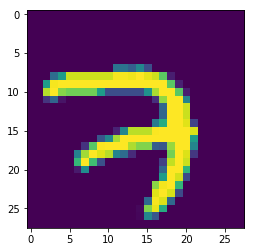

In [77]:
plt.imshow(Xsamp.reshape(28,28))

In [78]:
print(ysamp)

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


In [80]:

sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

NameError: name 'optimizer' is not defined